# Ćwiczenie laboratoryjne: Analiza danych z wykorzystaniem narzędzi do modelowania regresji

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

data = load_iris()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("R^2:", r2_score(y_test, y_pred_lr))

R^2: 0.9123881128593384


In [8]:
from sklearn.linear_model import Ridge
data = load_iris()
X, y = data.data, data.target
ridge = Ridge(alpha=1.0)
ridge.fit(X, y)

feature_importance = abs(ridge.coef_)
print("Ważność cech:", feature_importance)

Ważność cech: [0.11346491 0.03184254 0.25936799 0.53764103]


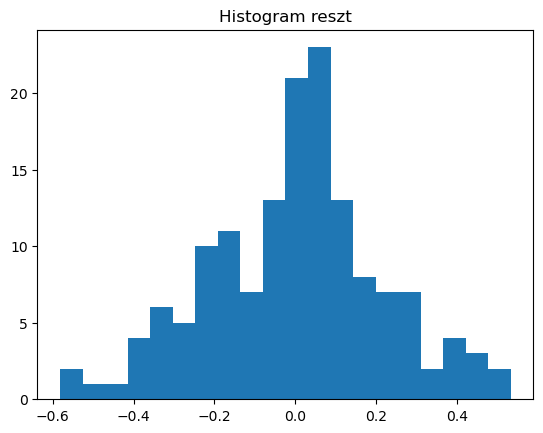

Statystyka Shapiro-Wilka: 0.9894937968102302 P-wartość: 0.32442510488341564


In [10]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import numpy as np

# Oblicz reszty
residuals = y - ridge.predict(X)

# Histogram reszt
plt.hist(residuals, bins=20)
plt.title("Histogram reszt")
plt.show()

# Test Shapiro-Wilka
stat, p = shapiro(residuals)
print("Statystyka Shapiro-Wilka:", stat, "P-wartość:", p)

In [12]:
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(residuals)
print("Statystyka Durbin-Watsona:", dw_stat)

Statystyka Durbin-Watsona: 1.0366570883366133


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Tworzenie sztucznego zbioru danych regresji
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1)
y = y.reshape(-1, 1)

# Normalizacja danych
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y)

# Podział na zbiory treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Budowa sieci neuronowej
model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Warstwa wyjściowa dla regresji
])

# Kompilacja modelu
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Trenowanie modelu
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32)

# Ocena modelu
loss, mae = model.evaluate(X_test, y_test)
print("Średni błąd absolutny (MAE):", mae)

# Przewidywanie
y_pred = scaler_y.inverse_transform(model.predict(X_test))

ModuleNotFoundError: No module named 'tensorflow'

## Kod Python do wizualizacji sieci neuronowej:

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

# Tworzenie przykładowej sieci neuronowej
model = Sequential([
    Dense(64, activation='relu', input_shape=(10,), name='hidden_layer_1'),
    Dense(32, activation='relu', name='hidden_layer_2'),
    Dense(1, name='output_layer')  # Warstwa wyjściowa do regresji
])

# Kompilacja modelu
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Wyświetlenie podsumowania modelu
print("Podsumowanie modelu:")
model.summary()

# Wizualizacja modelu za pomocą plot_model
plot_file = "model_architecture.png"
plot_model(model, to_file=plot_file, show_shapes=True, show_layer_names=True)

# Wyświetlanie zapisanego obrazu
img = plt.imread(plot_file)
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.title("Architektura sieci neuronowej")
plt.show()


ModuleNotFoundError: No module named 'tensorflow'